## 1. Data Loading and Basic Cleaning

- Loaded the NYC Airbnb dataset
- Inspected missing values and basic structure
- Dropped outliers in price and minimum_nights
- Converted data types and handled missing review info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

print("Shape of dataset:", df.shape)
print("\nColumn types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
df.head()

Shape of dataset: (48895, 16)

Column types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Missing values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2. Feature Engineering

- Created `price_per_review` feature  
- Created `high_availability` binary flag from availability_365  

In [2]:
# 💵 Convert 'price' to numeric if needed (this dataset already has it as int, but good habit)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 🧹 Remove price outliers (keep listings priced under $1000)
df = df[df['price'] > 0]
df = df[df['price'] <= 1000]

# 🧼 Drop rows with missing critical values (we’ll keep 'name' and 'last_review' as optional)
df = df.dropna(subset=['reviews_per_month', 'host_name'])

# 🧠 Convert some categorical variables for easier grouping later
cat_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
for col in cat_cols:
    df[col] = df[col].astype('category')

# 🛠️ Feature: price per review (helps normalize price vs. popularity)
df['price_per_review'] = df['price'] / (df['number_of_reviews'] + 1)  # +1 to avoid divide-by-zero

# 🛠️ Feature: availability flag
df['high_availability'] = df['availability_365'].apply(lambda x: 1 if x > 300 else 0)

# 🧼 Reset index after drops
df.reset_index(drop=True, inplace=True)

# ✅ Confirm changes
print("Cleaned shape:", df.shape)
df[['price', 'reviews_per_month', 'price_per_review', 'high_availability']].describe()


Cleaned shape: (38710, 18)


,price,reviews_per_month,price_per_review,high_availability
count,38710.000000,38710.000000,38710.000000,38710.000000
mean,135.911392,1.374734,22.576310,0.157065
std,108.655706,1.681453,35.601303,0.363867
min,10.000000,0.010000,0.074603,0.000000
25%,69.000000,0.190000,2.916667,0.000000
50%,100.000000,0.720000,10.000000,0.000000
75%,169.000000,2.020000,27.618750,0.000000
max,1000.000000,58.500000,500.000000,1.000000


## 3. Exploratory Data Analysis (EDA)

- Visualized distribution of price and room types  
- Compared price by borough (neighbourhood group)  
- Plotted listing density on a geographic map using longitude/latitude  
- Used barplots to show trends by room type and borough  

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


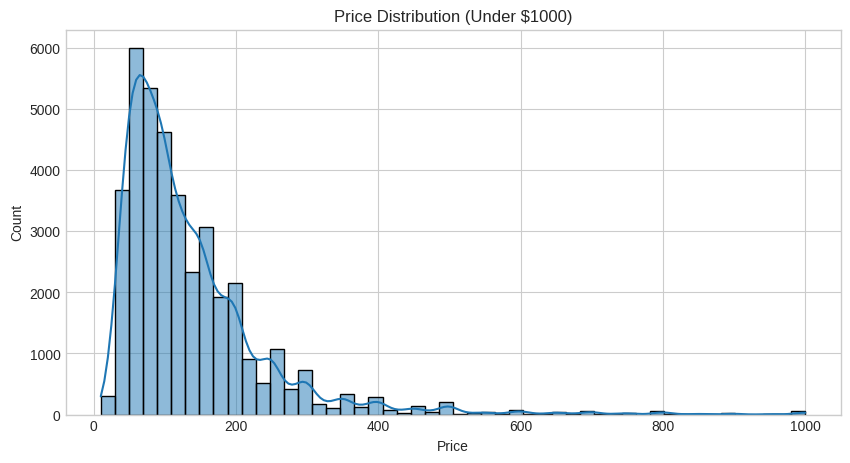

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


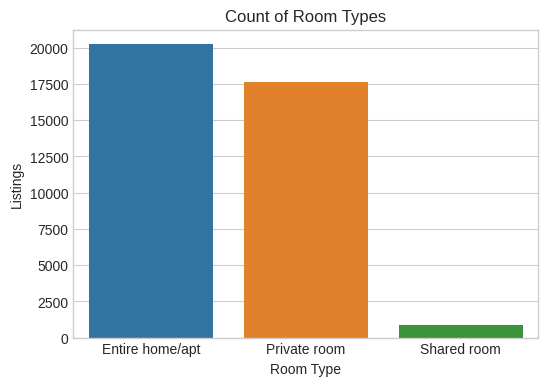

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


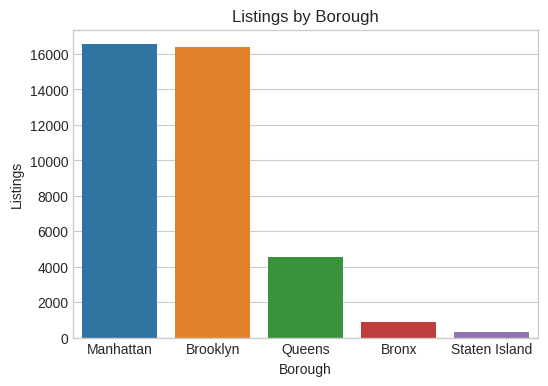

/tmp/ipykernel_13/1569919403.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='neighbourhood_group', y='price', ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


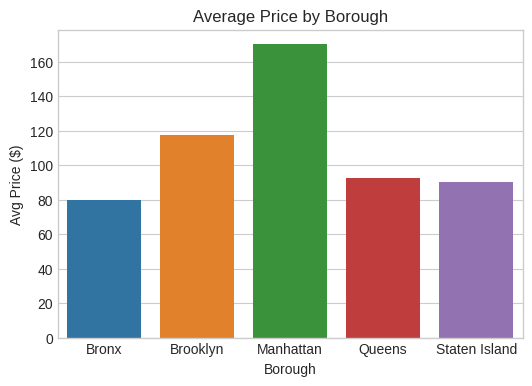

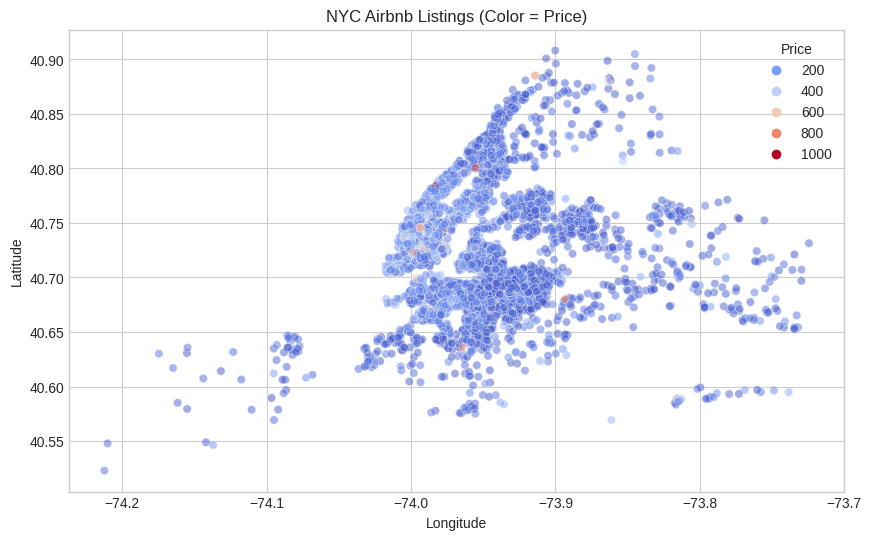

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Price Distribution (zoomed in under $1000)
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (Under $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# 🛏️ Room Type Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Listings')
plt.show()

# 📍 Listings by Borough
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Listings')
plt.show()

# 💵 Avg Price by Borough
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='neighbourhood_group', y='price', ci=None)
plt.title('Average Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Avg Price ($)')
plt.show()

# 🗺️ Location Scatter Map (color by price)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(5000), x='longitude', y='latitude', hue='price', palette='coolwarm', alpha=0.5)
plt.title('NYC Airbnb Listings (Color = Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper right')
plt.show()


## 4. Correlation Matrix + Export to Tableau

- Displayed heatmap of numeric feature correlations  
- Exported cleaned dataset as CSV for use in Tableau  

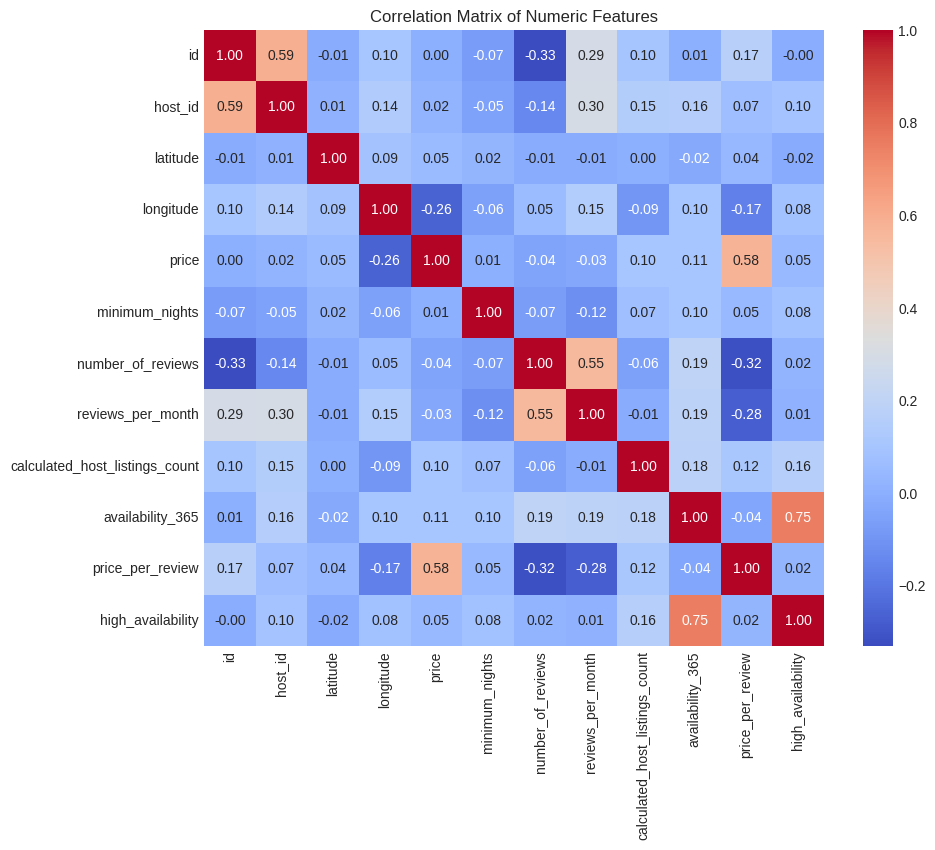

In [4]:
# 📊 Correlation Matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [5]:
# 💾 Save cleaned data for Tableau dashboard
df.to_csv('/kaggle/working/airbnb_cleaned.csv', index=False)

print("✅ Cleaned dataset exported to: /kaggle/working/airbnb_cleaned.csv")

✅ Cleaned dataset exported to: /kaggle/working/airbnb_cleaned.csv


## 5. Price Prediction Model

- Selected features and one-hot encoded categorical variables  
- Trained a Random Forest Regressor  
- Evaluated performance using RMSE and R²  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# 🎯 Features and target
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'availability_365', 'room_type', 'neighbourhood_group']
target = 'price'

# 🧠 One-hot encode categorical variables
df_model = df[features + [target]].copy()
df_model = pd.get_dummies(df_model, columns=['room_type', 'neighbourhood_group'], drop_first=True)

# 🧪 Train-test split
X = df_model.drop('price', axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 🌲 Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Predict on test set
y_pred = model.predict(X_test)

# 📊 Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: ${rmse:.2f}")
print(f"✅ R² Score: {r2:.3f}")


✅ RMSE: $84.20
✅ R² Score: 0.420


## 6. Feature Importance

- Identified key drivers of Airbnb price using feature importance plot  
- Found that longitude and room type are major factors  

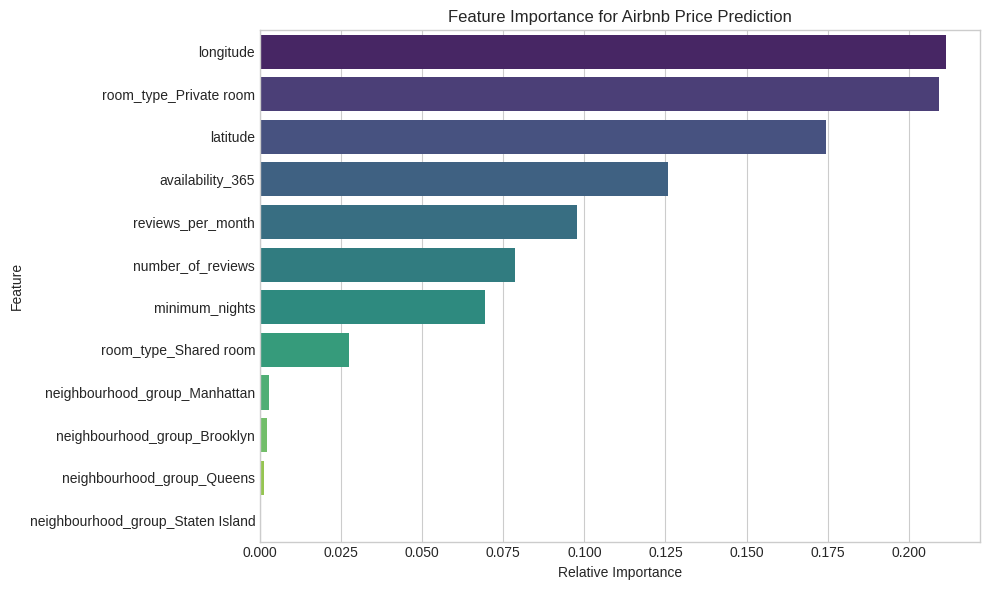

In [8]:
# 📊 Get feature importances
importances = model.feature_importances_
features_list = X.columns

# 🧱 Build a DataFrame for easy plotting
feat_imp_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 📈 Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Airbnb Price Prediction')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
